# Logistic Regression with non-linear features

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import ticker, cm

## load training data

In [2]:
fname_data1 = 'assignment_09_data1.txt'
fname_data2 = 'assignment_09_data2.txt'

data1        = np.genfromtxt(fname_data1, delimiter=',')
data2        = np.genfromtxt(fname_data2, delimiter=',')

number_data1 = data1.shape[0]
number_data2 = data2.shape[0]

data1_point     = data1[:, 0:2]
data1_point_x   = data1_point[:, 0]
data1_point_y   = data1_point[:, 1]
data1_label     = data1[:, 2]

data2_point     = data2[:, 0:2]
data2_point_x   = data2_point[:, 0]
data2_point_y   = data2_point[:, 1]
data2_label     = data2[:, 2]

data1_label_class_0     = (data1_label == 0)
data1_label_class_1     = (data1_label == 1)

data2_label_class_0     = (data2_label == 0)
data2_label_class_1     = (data2_label == 1)

data1_point_x_class_0   = data1_point_x[data1_label_class_0]
data1_point_y_class_0   = data1_point_y[data1_label_class_0]

data1_point_x_class_1   = data1_point_x[data1_label_class_1]
data1_point_y_class_1   = data1_point_y[data1_label_class_1]

data2_point_x_class_0   = data2_point_x[data2_label_class_0]
data2_point_y_class_0   = data2_point_y[data2_label_class_0]

data2_point_x_class_1   = data2_point_x[data2_label_class_1]
data2_point_y_class_1   = data2_point_y[data2_label_class_1]

print('shape of point in data1 = ', data1_point.shape)
print('shape of point in data2 = ', data2_point.shape)

print('shape of label in data1 = ', data1_label.shape)
print('shape of label in data2 = ', data2_label.shape)

print('data type of point x in data1 = ', data1_point_x.dtype)
print('data type of point y in data1 = ', data1_point_y.dtype)

print('data type of point x in data2 = ', data2_point_x.dtype)
print('data type of point y in data2 = ', data2_point_y.dtype)


shape of point in data1 =  (1000, 2)
shape of point in data2 =  (1000, 2)
shape of label in data1 =  (1000,)
shape of label in data2 =  (1000,)
data type of point x in data1 =  float64
data type of point y in data1 =  float64
data type of point x in data2 =  float64
data type of point y in data2 =  float64


## plot the data

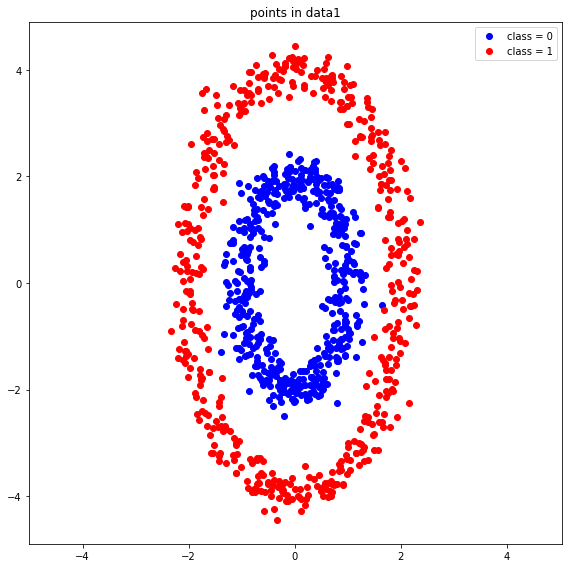

In [3]:
f = plt.figure(figsize=(8,8))   

plt.title('points in data1')
plt.plot(data1_point_x_class_0, data1_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data1_point_x_class_1, data1_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

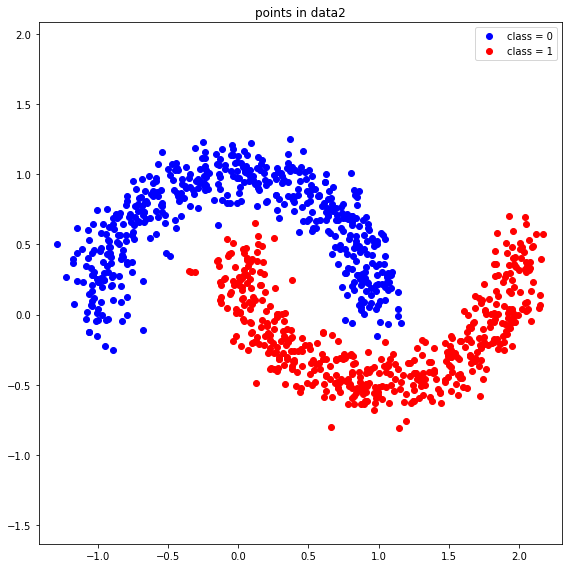

In [4]:
f = plt.figure(figsize=(8,8))   

plt.title('points in data2')
plt.plot(data2_point_x_class_0, data2_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data2_point_x_class_1, data2_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

## define the feature functions

- feature vector is defined by $(1, f_1(x, y), f_2(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$

In [5]:
def compute_feature1(point):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    x   = point[:, 0]
    y   = point[:, 1]
    
    t1=(x-np.mean(x))/np.max(x-np.mean(x))
    t2=(y-np.mean(y))/np.max(y-np.mean(y))
    t1 = t1*1.14 ## more precisely
    t2 = t2/0.88 ## more precisely for variance
    
    t3=np.power(t1,2)+np.power(t2,2)
    t3 = np.log2(t3)
    
    t3[486] -=0.5 ## recalculate for two congestion part point number 306 486 for accuracy
    #t3[306] -=0.3 ## 
    
    
   
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    return (1,t3.T) #max(t3),min(t3)max(t1),min(t1),max(t2),min(t2)#
    #return feature
print(compute_feature1(data1_point))


(1, array([-2.57681888e+00, -2.47696267e+00, -2.03363919e+00, -1.80262888e+00,
       -1.50988125e+00, -2.94453016e+00, -1.30207052e+00, -2.15775467e+00,
       -2.08907180e+00, -3.36826383e+00, -2.37249657e+00, -1.70531717e+00,
       -1.82921854e+00, -2.25034534e+00, -2.75139707e+00, -3.01038307e+00,
       -1.67096366e+00, -1.73857354e+00, -1.51915842e+00, -1.98783284e+00,
       -1.46319702e+00, -3.37344702e+00, -1.62452882e+00, -2.02057825e+00,
       -2.79910162e+00, -1.24570350e+00, -1.82843787e+00, -2.07308893e+00,
       -3.49401916e+00, -1.27916281e+00, -2.14495983e+00, -2.20314085e+00,
       -3.02156347e+00, -1.94025851e+00, -1.54985114e+00, -2.14766821e+00,
       -2.26924200e+00, -1.86390322e+00, -2.15807222e+00, -2.07205785e+00,
       -1.35180198e+00, -1.76063246e+00, -2.35371548e+00, -1.91084998e+00,
       -2.02510820e+00, -1.95783258e+00, -2.52440666e+00, -2.30338201e+00,
       -2.09977919e+00, -3.45503444e+00, -1.84964666e+00, -1.70341096e+00,
       -2.10771213e+0

In [6]:
def compute_feature2(point):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    x   = point[:, 0]
    y   = point[:, 1]
    x = x-np.mean(x)
    y= y-np.mean(y)
    x = x/np.max(np.abs(x))
    x -= (np.max(x)+np.min(x))/2
    x=(x/np.max(x))
    y = y/np.max(np.abs(y))
    y -=(np.max(y)+np.min(y))/2
    y =(y/np.max(y))
    k= np.zeros(len(point))
    error =1.77 # value error
    error2  =1/4
   
    a= np.sqrt(np.power((x+1),2) +np.power((1-error2-y)*error,2))
    b= np.sqrt(np.power((x-5/12),2) +np.power((1-error2-y)*error,2))
    c=np.sqrt(np.power((x+5/12),2) +np.power((-1+error2-y)*error,2))
    d=np.sqrt(np.power((x-1),2) +np.power((-1+error2-y)*error,2))
    e=np.sqrt(np.power((x+1/3),2) +np.power((-1+error2-y)*error,2))
    f=np.sqrt(np.power((x-1/3),2) +np.power((1+error2-y)*error,2))
    
    #a= np.power((x+5/6),2) +np.power((2/3-y),2)
    #b= np.power((x-1/6),2) +np.power((2/3-y),2)
    #c=np.power((x+1/6),2) +np.power((2/3+y),2)
    #d=np.power((x-5/6),2) +np.power((2/3+y),2)
    k= np.zeros(1000)
    for i in range(1000):
        k[i] = (a[i]+b[i]-c[i]-d[i])
        
        #k[i]=min(c[i],d[i],f[i])-min(a[i],b[i],e[i])
    
        #x   = point[:, 0]
        #y   = point[:, 1]
        #k=np.power(x,3)-(6/4)*(np.power(x,2))-(x/16)+15/32
        #k = 2*k-y
        #k -= (max(k)+min(k))/2

    #a1 = np.sqrt(np.power((x+3/4),2)+np.power((y-3/4),2))
    #b1 = np.sqrt(np.power((x-3/4),2)+np.power((y-3/4),2))
    #c1 = np.sqrt(np.power((x),2)+np.power((y+1/2),2))
    #d1 = np.sqrt(np.power((x-2),2)+np.power((y+1/2),2))
    #for i in range(1000):
        #k[i] = (c1[i]+d1[i]-a1[i]-b1[i])
        #k[i]=min(c1[i],d1[i])-min(a1[i],b1[i])
    k-= (max(k)+min(k))/2
    k= k *3/4
    
    


   
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    return (1,k)
    #return feature


print(compute_feature2(data2_point))

(1, array([ 1.23280875e+00,  1.18491843e+00,  1.43333114e+00,  7.01835184e-01,
        1.34806489e+00,  7.12054068e-01,  9.53048247e-01,  3.58516724e-01,
        3.02878951e-01,  8.49673572e-01,  8.15071243e-01,  6.20761578e-01,
        1.34607583e+00,  1.55265338e-01,  9.54193952e-01,  1.77738195e+00,
        2.89748824e-01,  4.88879279e-01,  7.49772564e-02,  1.43321845e+00,
        1.67536281e-01, -2.41957176e-01,  1.71482708e-01,  1.22310953e-01,
       -4.22946402e-01,  7.95487729e-01,  1.05579570e-01, -2.06594860e-01,
        6.85874893e-01,  7.61854079e-01,  1.02322212e-01, -1.23484316e+00,
        4.37164672e-01,  1.48150341e-01, -1.17256741e-01,  9.91078041e-01,
        1.08074475e+00,  1.77533837e-01, -1.15427761e-01,  4.37049616e-01,
        3.60057696e-01, -6.12059131e-01,  8.72319968e-01, -2.46734624e-01,
        1.82005245e-01, -1.02367416e+00,  7.47045471e-01, -9.04544363e-01,
       -5.77011690e-02, -3.71671228e-02, -1.01934430e+00, -1.71510972e-01,
       -3.09427858e-0

## define the linear regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature = $(1, f_1(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$

In [7]:
def compute_linear_regression(theta, feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    value = np.dot(theta,feature)
    #value = theta[0]+theta[1]*feature[1]
    

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value#.shape #len(theta), len(feature)
print(compute_linear_regression((0,1),compute_feature2(data2_point)))

[ 1.23280875e+00  1.18491843e+00  1.43333114e+00  7.01835184e-01
  1.34806489e+00  7.12054068e-01  9.53048247e-01  3.58516724e-01
  3.02878951e-01  8.49673572e-01  8.15071243e-01  6.20761578e-01
  1.34607583e+00  1.55265338e-01  9.54193952e-01  1.77738195e+00
  2.89748824e-01  4.88879279e-01  7.49772564e-02  1.43321845e+00
  1.67536281e-01 -2.41957176e-01  1.71482708e-01  1.22310953e-01
 -4.22946402e-01  7.95487729e-01  1.05579570e-01 -2.06594860e-01
  6.85874893e-01  7.61854079e-01  1.02322212e-01 -1.23484316e+00
  4.37164672e-01  1.48150341e-01 -1.17256741e-01  9.91078041e-01
  1.08074475e+00  1.77533837e-01 -1.15427761e-01  4.37049616e-01
  3.60057696e-01 -6.12059131e-01  8.72319968e-01 -2.46734624e-01
  1.82005245e-01 -1.02367416e+00  7.47045471e-01 -9.04544363e-01
 -5.77011690e-02 -3.71671228e-02 -1.01934430e+00 -1.71510972e-01
 -3.09427858e-02  2.69187909e-01 -7.70823382e-01 -1.15801453e-01
 -1.21499935e+00 -1.61730836e-01 -2.64686719e-01  2.52833375e-01
 -5.72282617e-01 -4.70846

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


## define sigmoid function with input

- $z \in \mathbb{R}$

In [8]:
def sigmoid(z):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    value = 1/(1+np.exp(-z))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value 
sigmoid(compute_linear_regression((0,1),compute_feature2(data2_point)))

array([0.77430979, 0.765831  , 0.80741982, 0.66859453, 0.79381308,
       0.67085487, 0.72172779, 0.58868133, 0.57514615, 0.70049866,
       0.6931891 , 0.65039174, 0.79348733, 0.53873854, 0.72195783,
       0.85537329, 0.57193464, 0.61984238, 0.51873554, 0.80740229,
       0.54178638, 0.43980409, 0.54276593, 0.53053967, 0.39581192,
       0.68900844, 0.5263704 , 0.44853421, 0.66504865, 0.68175614,
       0.52555826, 0.22533488, 0.60758322, 0.53696999, 0.47071936,
       0.7293008 , 0.74663489, 0.54426725, 0.47117506, 0.60755579,
       0.5890544 , 0.35158963, 0.70522821, 0.43862738, 0.54537612,
       0.26431234, 0.67853458, 0.28811753, 0.48557871, 0.49070929,
       0.26515514, 0.45722706, 0.49226492, 0.56689353, 0.31630102,
       0.47108195, 0.22881767, 0.45965519, 0.43421196, 0.56287377,
       0.36071029, 0.38441588, 0.21180719, 0.45519843, 0.59402193,
       0.27339115, 0.32808971, 0.37348896, 0.14919496, 0.39595639,
       0.30471549, 0.26298922, 0.45833766, 0.39816223, 0.12418

## define the logistic regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$

In [9]:
def compute_logistic_regression(theta, feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    value = sigmoid(compute_linear_regression(theta, feature))
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value
print(compute_logistic_regression((0.10248818, 0.10248818), compute_feature2(data2_point)))

[0.55696078 0.55574932 0.56202578 0.54349429 0.55987355 0.54375413
 0.54987468 0.53475185 0.53333291 0.547251   0.54637219 0.541432
 0.55982332 0.52956573 0.54990374 0.57068557 0.53299797 0.53807428
 0.52751529 0.56202294 0.52987902 0.51941284 0.52997978 0.52872424
 0.51478099 0.54587469 0.52829694 0.52031747 0.54308842 0.54502005
 0.52821375 0.49398313 0.53675667 0.52938406 0.52260227 0.5508392
 0.55311181 0.53013426 0.52264904 0.53675374 0.53479115 0.50993853
 0.547826   0.51929062 0.53024841 0.49939342 0.54464367 0.50244575
 0.52412488 0.52464975 0.49950436 0.52121484 0.52480884 0.53247342
 0.5058717  0.52263948 0.4944915  0.52146497 0.51883132 0.53205612
 0.51095724 0.51355467 0.49195367 0.52100569 0.53531533 0.50057689
 0.50725469 0.5123658  0.481025   0.51479645 0.50448521 0.4992188
 0.52132927 0.51503232 0.47559065 0.49855524 0.45634869 0.52029684
 0.5133825  0.5271924  0.52687876 0.47514415 0.49819517 0.5161422
 0.48881796 0.49587343 0.49748262 0.48551685 0.49516252 0.50531463


## define the residual function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [10]:
def compute_residual(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    residual = -label*np.log(compute_logistic_regression(theta,feature))-(1-label)*np.log(1-compute_logistic_regression(theta,feature))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return residual
compute_residual((1,1),compute_feature2(data2_point),data2_label)

array([2.33466729, 2.2915164 , 2.51743702, 1.86933796, 2.43932497,
       1.87798762, 2.08569016, 1.58727787, 1.54327153, 1.99575334,
       1.96592476, 1.80120474, 2.43750955, 1.42908219, 2.08669361,
       2.83772526, 1.53296158, 1.6923305 , 1.36862066, 2.51733342,
       1.43842758, 1.14234056, 1.44143893, 1.4041208 , 1.02273283,
       1.94910665, 1.39152437, 1.16655504, 1.85585583, 1.9203321 ,
       1.38907809, 0.58260373, 1.65033908, 1.42367606, 1.22891588,
       2.11907376, 2.19838307, 1.44606174, 1.23021002, 1.65024611,
       1.58850394, 0.90581308, 2.01535179, 1.13908994, 1.44948195,
       0.68138016, 1.90770758, 0.74201354, 1.27140895, 1.28622692,
       0.68352181, 1.19084386, 1.29073527, 1.51687559, 0.81428641,
       1.22994555, 0.5914145 , 1.19766129, 1.12691964, 1.50413216,
       0.92970143, 0.9923234 , 0.54839335, 1.18515931, 1.60489869,
       0.70446819, 0.8447176 , 0.96335729, 0.38979011, 1.02311972,
       0.78450163, 0.67801865, 1.19396026, 1.02903125, 0.32600

## define the loss function for the logistic regression

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [11]:
def compute_loss(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    loss = np.mean(-label*np.log(compute_logistic_regression(theta,feature))-(1-label)*np.log(1-compute_logistic_regression(theta,feature)))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return loss
compute_loss((0,0),compute_feature2(data2_point),data2_label)

0.6931471805599454

## define the gradient of the loss with respect to the model parameter $\theta$

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [12]:
def compute_gradient(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    h_i=compute_logistic_regression(theta, feature)
    t1=(h_i-label)
    
    k=np.dot(feature[1],t1)
    gradient = (k)/len(label) ## point summation point*(hi-label)/n

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return gradient
print(compute_gradient((0,0),compute_feature2(data2_point),data2_label))

-0.8594091389901015


## compute the accuracy of the prediction for point with a given model parameter

In [13]:
def compute_accuracy(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    t=compute_logistic_regression(theta, feature)
    count = 0
    lenz = len(label)
    for i in range(lenz):
        if t[i] >=0.5:
            discrimination = 1
        else:
            discrimination =0
        if label[i] == discrimination:
            count +=1
        else:
            print(i)
            #print(feature[1][i])
            print(t[i])

    accuracy = (count/lenz)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return accuracy
print(compute_accuracy((-0.29295317, -0.29295317), compute_feature2(data2_point),data2_label))

31
0.5171927310044668
45
0.5017338479982288
50
0.5014167393772111
56
0.5157409815157138
62
0.5229854736414309
68
0.5540523316543443
71
0.5022329807011547
74
0.5693769758565875
75
0.5041296446063405
76
0.6225455863076006
81
0.5706312680985339
82
0.5051587797258751
84
0.531924697543412
85
0.5117934948951374
86
0.5071952535937069
87
0.5413159365784931
88
0.5138244057266186
90
0.5223654476931908
91
0.530208367855982
92
0.5066290390622723
93
0.5285670592552179
95
0.5121238068853031
96
0.5180815918215101
97
0.5944236564368566
98
0.5425316263605117
99
0.5049294958363308
100
0.5070551145220606
102
0.5765537126635181
103
0.5670073620284677
104
0.6120324064762784
105
0.546331483295781
106
0.5546790263623996
107
0.5187022358596445
108
0.5489357197496236
109
0.5297937554777867
110
0.5320009675215625
111
0.5644176283830319
112
0.5527616355898777
113
0.5698090502343515
114
0.5473854100526592
115
0.5455025942364461
116
0.5678642249059782
117
0.5676204791024411
118
0.5733494956493462
119
0.57149295189

## initialize the gradient descent algorithm

In [14]:
data1_number_iteration   = 1000
data2_number_iteration   = 400

data1_learning_rate   = 0.09
data2_learning_rate   = 0.02

data1_number_feature    = 2
data2_number_feature    = 2

theta1  = np.zeros(data1_number_feature)
theta2  = (-0.0854,0)

data1_loss_iteration  = np.zeros(data1_number_iteration)
data2_loss_iteration  = np.zeros(data2_number_iteration)

data1_accuracy_iteration    = np.zeros(data1_number_iteration)
data2_accuracy_iteration    = np.zeros(data2_number_iteration)

## run the gradient descent algorithm to optimize the loss function with respect to the model parameter

In [15]:
for i in range(data1_number_iteration):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    feature1 = compute_feature1(data1_point)
    loss=compute_loss(theta1, feature1, data1_label)
    
    theta1      = theta1-data1_learning_rate*compute_gradient(theta1, feature1, data1_label)
    loss1       =loss
    accuracy1 = compute_accuracy(theta1, feature1, data1_label)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    data1_loss_iteration[i]     = loss1
    data1_accuracy_iteration[i] = accuracy1

data1_theta_optimal = theta1
print(data1_accuracy_iteration[999])
print(theta1)

print(loss1)

306
0.5021436003900923
306
0.5042301615544967
306
0.5062612513370289
306
0.5082385038558339
306
0.5101635980044037
306
0.5120382381865457
306
0.5138641374287555
306
0.515643002890261
306
0.5173765236951028
306
0.5190663609417409
306
0.5207141397011521
306
0.5223214427903057
306
0.5238898060998852
306
0.5254207152589392
306
0.526915603431044
306
0.5283758500534813
306
0.5298027803504615
306
0.5311976654718124
306
0.5325617231285614
306
0.5338961186156995
306
0.5352019661296467
306
0.5364803303033382
306
0.5377322278953649
306
0.538958629581276
306
0.5401604618051367
306
0.5413386086578578
306
0.5424939137558871
306
0.5436271820997061
306
0.5447391818964286
306
0.5458306463347452
306
0.5469022753036843
306
0.5479547370492577
306
0.5489886697651369
306
0.5500046831151644
306
0.5510033596867984
306
0.5519852563756092
306
0.5529509057017131
306
0.5539008170596229
306
0.5548354779034195
306
0.5557553548694599
306
0.5566608948390452
306
0.5575525259435989
306
0.5584306585149799
306
0.55929568

In [16]:
for i in range(data2_number_iteration):
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    feature2 = compute_feature2(data2_point)
    loss=compute_loss(theta2, feature2, data2_label)
    theta2      = theta2-data2_learning_rate*compute_gradient(theta2, feature2,data2_label)
    loss2       =loss
    accuracy2  = compute_accuracy(theta2,feature2,data2_label)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    data2_loss_iteration[i]     = loss2
    data2_accuracy_iteration[i] = accuracy2

data2_theta_optimal = theta2

print(theta2)

print(loss2)
print(data2_accuracy_iteration[399])

500
0.4802865134703143
501
0.48319193155488754
502
0.4766411031146048
503
0.4774485175200706
504
0.4800752568510567
505
0.478087502795487
506
0.47867186432636133
507
0.4788060481929489
508
0.48023380897616547
509
0.48276476873912794
510
0.47958076568689023
511
0.4780348001349618
512
0.48195095916518066
513
0.4794330477282762
514
0.4813981602813855
515
0.4814037647661001
516
0.47632215265187344
517
0.4793691302707975
518
0.4813214863358311
519
0.4855108558056149
520
0.4832892856053187
521
0.4857229701413885
522
0.48013687660433374
523
0.4816967236444085
524
0.48457712371868655
525
0.48201133143027786
526
0.4828694124362249
527
0.48066117491565274
528
0.4812257043492859
529
0.4823363017324298
530
0.48343240921297953
531
0.4829649651539353
532
0.4849861238156056
533
0.4803773047510873
534
0.4799688308501248
535
0.4878103786900194
536
0.4818842704440944
537
0.48408558172052746
538
0.4821824482664819
539
0.4843558206183108
540
0.4856267382597143
541
0.483275881694617
542
0.4878581750379258


___

___

## functions for presenting the results

___

___

In [17]:
def function_result_01():

    print("final loss for data1 = {:13.10f}".format(data1_loss_iteration[-1]))

In [18]:
def function_result_02():

    print("final loss for data2 = {:13.10f}".format(data2_loss_iteration[-1]))

In [19]:
def function_result_03():

    print("final accuracy for data1 = {:13.10f}".format(data1_accuracy_iteration[-1]))

In [20]:
def function_result_04():

    print("final accuracy for data2 = {:13.10f}".format(data2_accuracy_iteration[-1]))

In [21]:
def function_result_05():
    
    plt.figure(figsize=(8,6))
    plt.title('loss for data1')

    plt.plot(data1_loss_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [22]:
def function_result_06():

    plt.figure(figsize=(8,6))
    plt.title('loss for data2')

    plt.plot(data2_loss_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [23]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('accuracy for data1')

    plt.plot(data1_accuracy_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

In [24]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('accuracy for data2')

    plt.plot(data2_accuracy_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

## plot the linear regression values over the 2-dimensional Euclidean space and superimpose the training data

In [25]:
def function_result_09():

    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('linear regression values')
    
    min_x   = np.min(data1_point_x)
    max_x   = np.max(data1_point_x)
    min_y   = np.min(data1_point_y)
    max_y   = np.max(data1_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [26]:
def function_result_10():
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('linear regression values')
    
    min_x   = np.min(data2_point_x)
    max_x   = np.max(data2_point_x)
    min_y   = np.min(data2_point_y)
    max_y   = np.max(data2_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

## plot the logistic regression values over the 2-dimensional Euclidean space

In [27]:
def function_result_11():

    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('logistic regression values')
    
    min_x   = np.min(data1_point_x)
    max_x   = np.max(data1_point_x)
    min_y   = np.min(data1_point_y)
    max_y   = np.max(data1_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [28]:
def function_result_12():
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('logistic regression values')

    min_x   = np.min(data2_point_x)
    max_x   = np.max(data2_point_x)
    min_y   = np.min(data2_point_y)
    max_y   = np.max(data2_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

___

___

## results

___

___

**************************************************
## [RESULT 01]
**************************************************
final loss for data1 =  0.0230212345
**************************************************
## [RESULT 02]
**************************************************
final loss for data2 =  0.3481126757
**************************************************
## [RESULT 03]
**************************************************
final accuracy for data1 =  0.9990000000
**************************************************
## [RESULT 04]
**************************************************
final accuracy for data2 =  0.8490000000
**************************************************
## [RESULT 05]
**************************************************


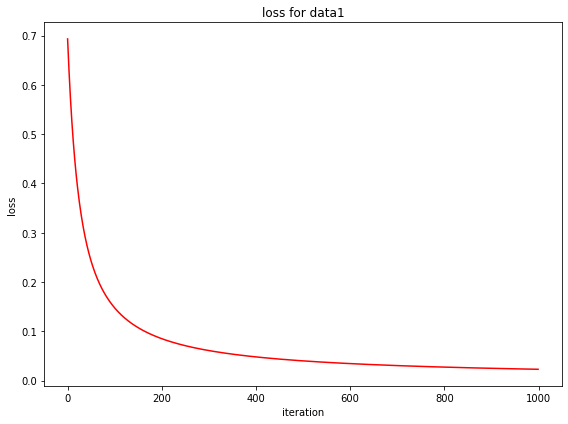

**************************************************
## [RESULT 06]
**************************************************


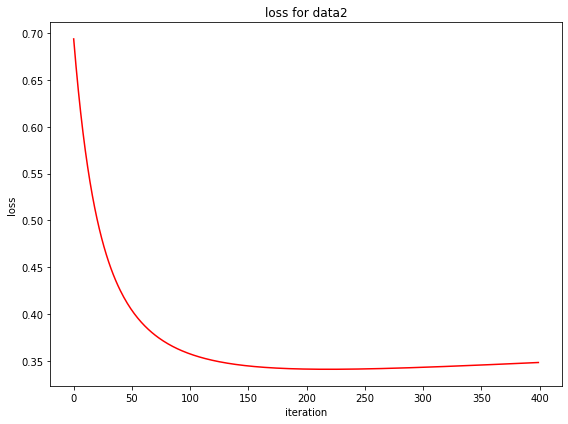

**************************************************
## [RESULT 07]
**************************************************


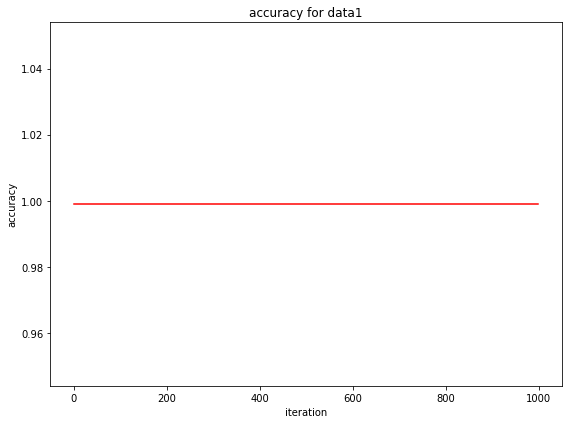

**************************************************
## [RESULT 08]
**************************************************


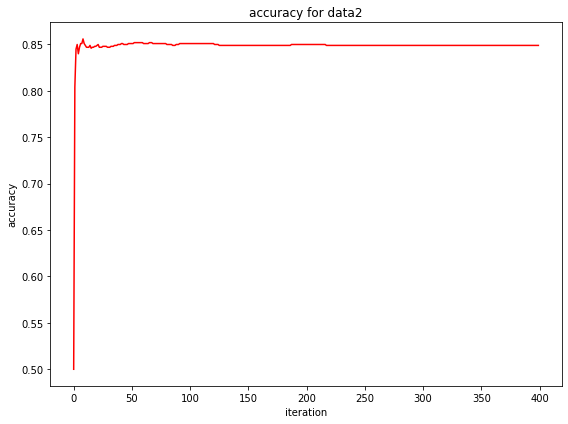

**************************************************
## [RESULT 09]
**************************************************


No handles with labels found to put in legend.


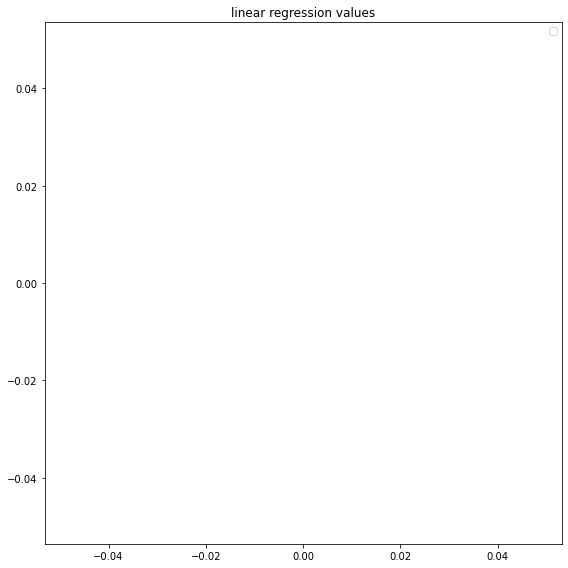

No handles with labels found to put in legend.


**************************************************
## [RESULT 10]
**************************************************


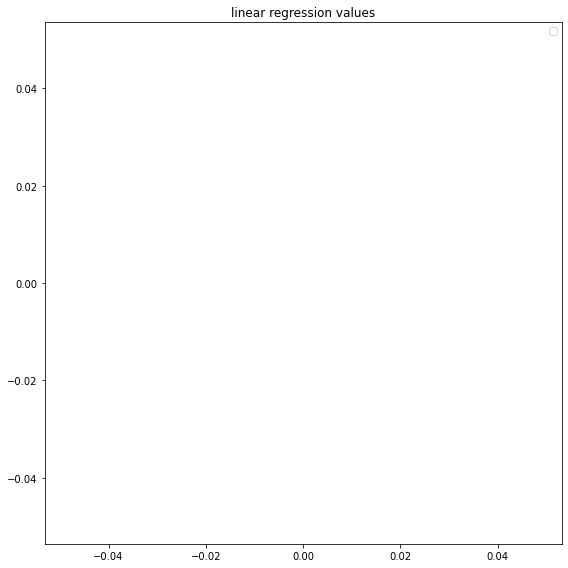

No handles with labels found to put in legend.


**************************************************
## [RESULT 11]
**************************************************


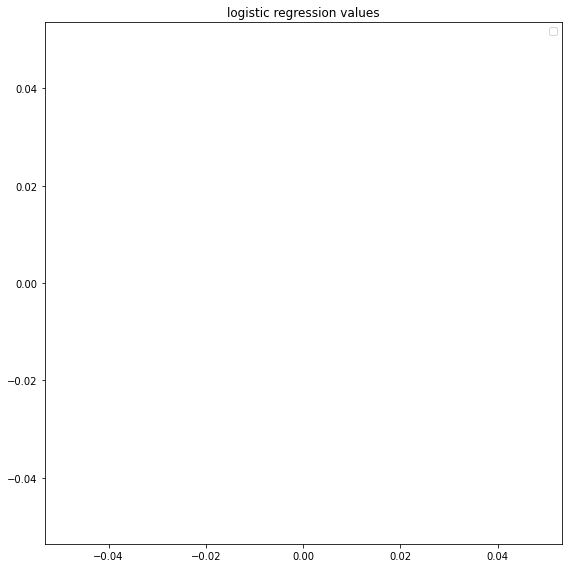

No handles with labels found to put in legend.


**************************************************
## [RESULT 12]
**************************************************


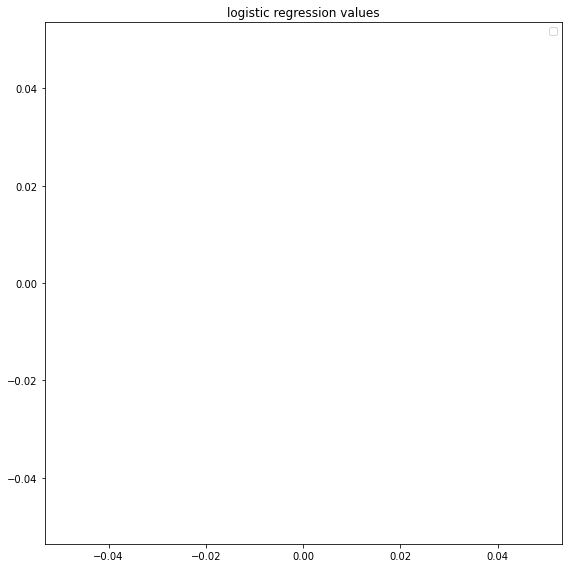

In [29]:
number_result = 12

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)